In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
cd /content/drive/MyDrive/Colab Notebooks/DataScience with Python/Final

/content/drive/MyDrive/Colab Notebooks/DataScience with Python/Final


In [ ]:
r=pd.read_csv('ratings.csv')
r.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
m=pd.read_csv('movies.csv')
m.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
m['genres'] = m['genres'].str.split('|')
m['genres'].head()

0    [Adventure, Animation, Children, Comedy, Fantasy]
1                       [Adventure, Children, Fantasy]
2                                    [Comedy, Romance]
3                             [Comedy, Drama, Romance]
4                                             [Comedy]
Name: genres, dtype: object

In [ ]:
#drop the titled without year
m=m[(m['title'].str[-1]==')')&(m['title'].str[-6]=='(')]


In [ ]:
m['year']=m['title'].str[-5:-1]
m['year'].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0    1995
1    1995
2    1995
3    1995
4    1995
Name: year, dtype: object

In [ ]:
m['year']=pd.to_numeric(m['year'])
m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9718 entries, 0 to 9741
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9718 non-null   int64 
 1   title    9718 non-null   object
 2   genres   9718 non-null   object
 3   year     9718 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 379.6+ KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
m.sort_values('year').head()

,movieId,title,genres,year
5868,32898,"Trip to the Moon, A (Voyage dans la lune, Le) ...","[Action, Adventure, Fantasy, Sci-Fi]",1902
6355,49389,The Great Train Robbery (1903),"[Crime, Western]",1903
9020,140541,The Electric Hotel (1908),"[Animation, Comedy, Sci-Fi]",1908
4743,7065,"Birth of a Nation, The (1915)","[Drama, War]",1915
8170,102747,"Rink, The (1916)",[Comedy],1916


In [ ]:
#remove yr from title
m['title']=m['title'].str[:-7]

In [ ]:
m.head()

,movieId,title,genres,year
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995
1,2,Jumanji,"[Adventure, Children, Fantasy]",1995
2,3,Grumpier Old Men,"[Comedy, Romance]",1995
3,4,Waiting to Exhale,"[Comedy, Drama, Romance]",1995
4,5,Father of the Bride Part II,[Comedy],1995


In [ ]:
m.astype({'year': 'int32'}).dtypes

movieId     int64
title      object
genres     object
year        int32
dtype: object

In [ ]:
m.to_csv('m_cleaned.csv')

In [ ]:
del r['timestamp']

In [ ]:
r.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [ ]:
#Merge movies and ratings dataframes for easier reference.
df = pd.merge(r, m, on='movieId', how='left')

In [ ]:
print(m.shape)
print(r.shape)
print(df.shape)

(9718, 4)
(100836, 3)
(100836, 6)


In [ ]:
df.head()

,userId,movieId,rating,title,genres,year
0,1,1,4.0,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995.0
1,1,3,4.0,Grumpier Old Men,"[Comedy, Romance]",1995.0
2,1,6,4.0,Heat,"[Action, Crime, Thriller]",1995.0
3,1,47,5.0,Seven (a.k.a. Se7en),"[Mystery, Thriller]",1995.0
4,1,50,5.0,"Usual Suspects, The","[Crime, Mystery, Thriller]",1995.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   userId   100836 non-null  int64  
 1   movieId  100836 non-null  int64  
 2   rating   100836 non-null  float64
 3   title    100805 non-null  object 
 4   genres   100805 non-null  object 
 5   year     100805 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 5.4+ MB


In [ ]:
#Check sparsity of matrix
numratings = len(df['rating'])
numusers = len(df['userId'].unique())
numitems = len(df['movieId'].unique())

sparse = 1 - (numratings / (numusers*numitems))
sparse

0.9830003169443864

In [ ]:
#Filter out users who have rated less than 200 movies 
df = df.groupby('userId').filter(lambda x: len(x)>100)

In [ ]:
#Filter out movies who have rated less than 10 movies 
df = df.groupby('movieId').filter(lambda x: len(x)>5)

In [ ]:
#Check sparsity of matrix
numratings = len(df['rating'])
numusers = len(df['userId'].unique())
numitems = len(df['movieId'].unique())

sparse = 1 - (numratings / (numusers*numitems))
sparse

0.9059040250529612

In [ ]:
#Check for NA values 
df.isna().sum()

userId     0
movieId    0
rating     0
title      0
genres     0
year       0
dtype: int64

In [ ]:
df.shape

(71512, 6)

In [ ]:
df.head()

,userId,movieId,rating,title,genres,year
0,1,1,4.0,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995.0
1,1,3,4.0,Grumpier Old Men,"[Comedy, Romance]",1995.0
2,1,6,4.0,Heat,"[Action, Crime, Thriller]",1995.0
3,1,47,5.0,Seven (a.k.a. Se7en),"[Mystery, Thriller]",1995.0
4,1,50,5.0,"Usual Suspects, The","[Crime, Mystery, Thriller]",1995.0


##EDA

#EDA for Dataset 1

In [ ]:
# Importing Libraries

import seaborn as sns
from matplotlib import pyplot as plt

Most Popular Genres release

<BarContainer object of 19 artists>

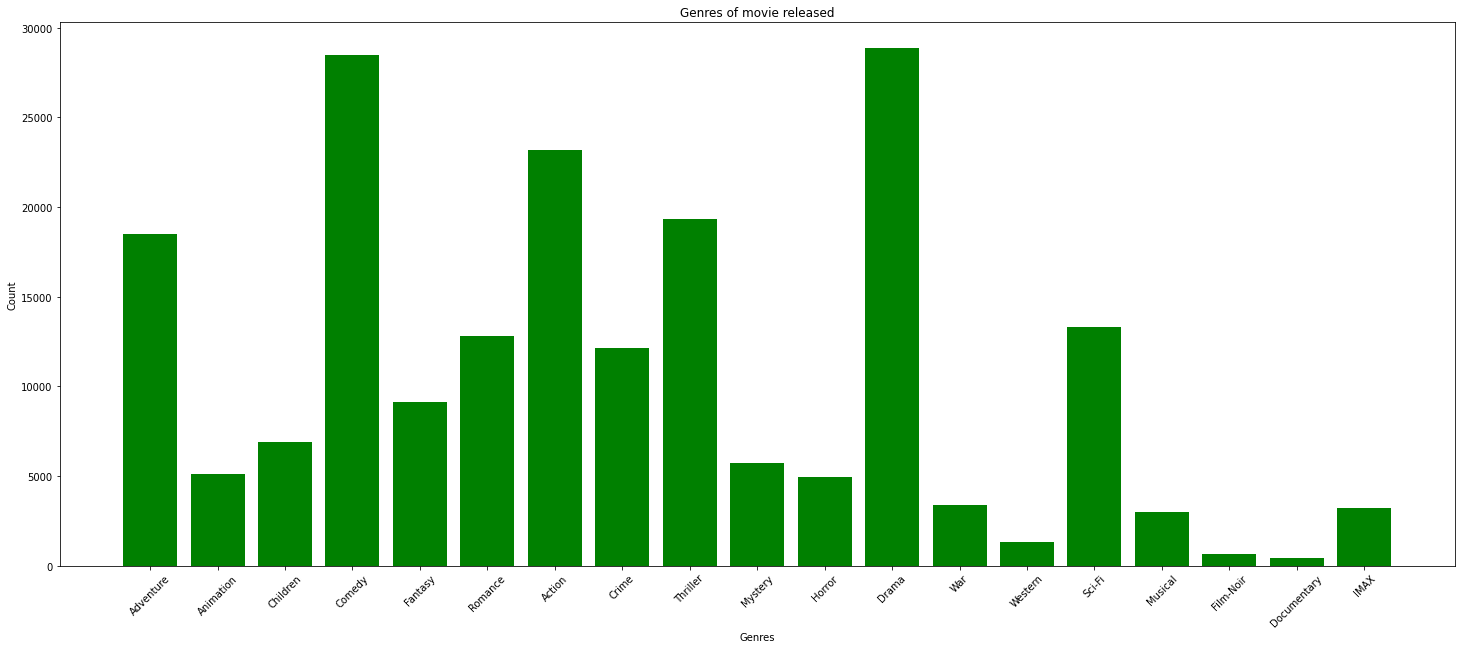

In [ ]:
plt.figure(figsize=(25,10))  # Determing the size of the plot
genre_list = df['genres'] # Storing the genre column values in a variable
genres_count_popular = {} # Declaring an empty dictionary
for genre_index in genre_list:  # for loop for the rows in genre column
    for genre in genre_index:   # for loop for genres in list of genres
        if(genres_count_popular.get(genre,False)):   # if condition to add the genre count 
            genres_count_popular[genre]=genres_count_popular[genre]+1
        else:
            genres_count_popular[genre] = 1
plt.xlabel("Genres") # Labelling X-axis
plt.ylabel("Count") # Labelling Y-axis
plt.title("Genres of movie released") # Giving Title for the plot
plt.xticks(rotation = 45)       

plt.bar(genres_count_popular.keys(),genres_count_popular.values(),color='green') # plotting bar graph with genres and their count


Frequency of the Ratings given by the User

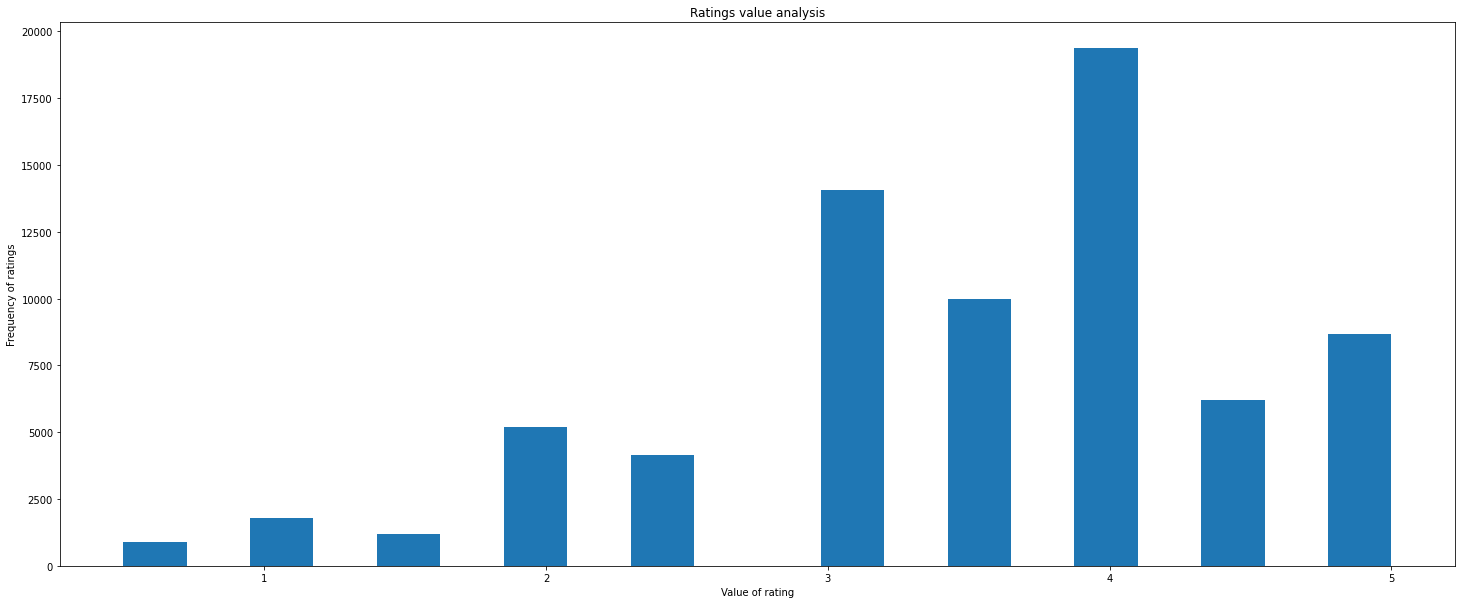

In [ ]:
#Plotting a histogram of the frequency of certain rating values
plt.figure(figsize=(25,10))
plt.hist(df['rating'],bins=20)
plt.xlabel('Value of rating')  # Labelling X-axis
plt.ylabel('Frequency of ratings') # Labelling Y-axis
plt.title("Ratings value analysis") # Giving Title for the plot
plt.show()

Top 15 users who have rated most of the movies

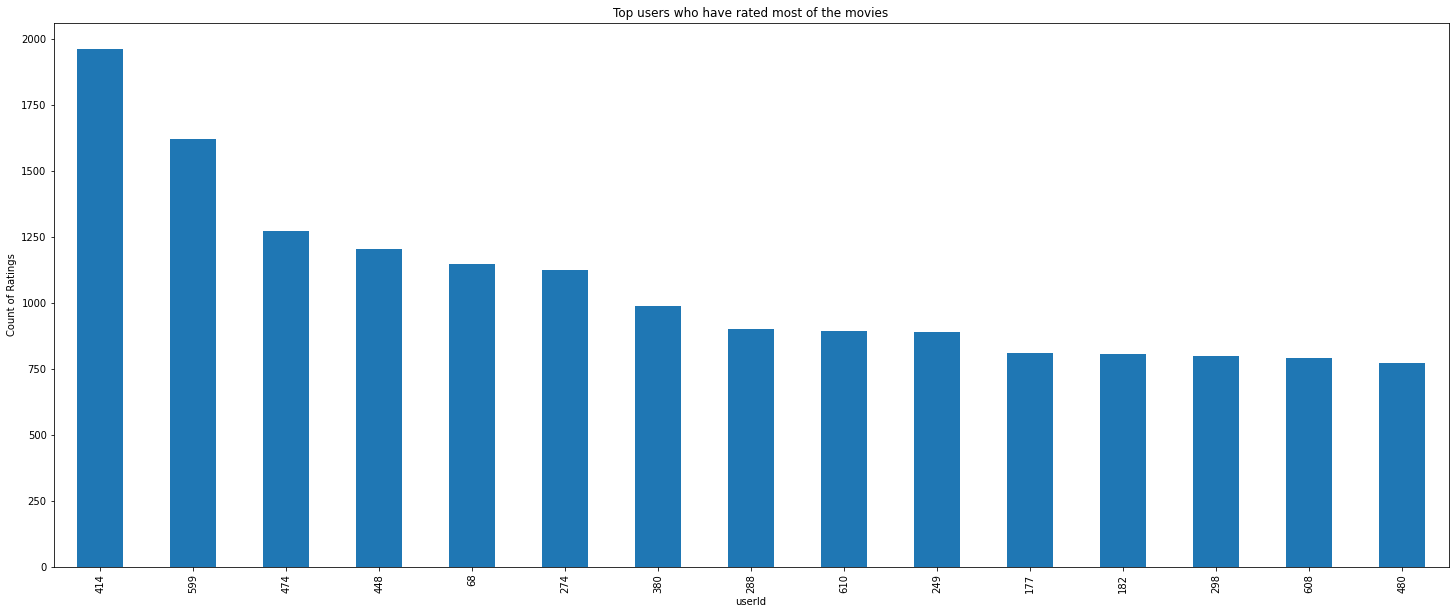

In [ ]:

users_grouped_rating = df.groupby('userId').agg([np.size]) # Grouping by userid

users_grouped_rating.head()

plt.xlabel("UserId") # Labelling X-axis
plt.ylabel("Count of Ratings") # Labelling Y-axis
plt.title("Top users who have rated most of the movies") # Giving Title for the plot

users_grouped_rating['rating']['size'].sort_values(ascending=False).head(15).plot( kind = 'bar', figsize = (25,10))




Movies with high average rating

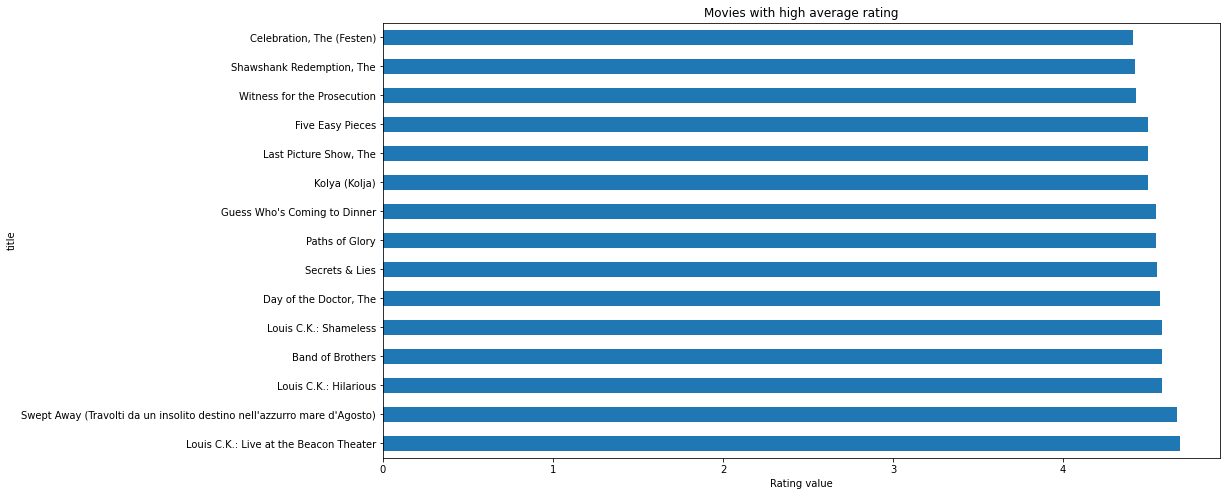

In [ ]:
movies_grouped_rating = df.groupby('title').agg([np.size, np.mean]) # Grouping by title and calculating mean

movies_grouped_rating.head()

plt.xlabel("Rating value") # Labelling X-axis
plt.ylabel("Title") # Labelling Y-axis
plt.title("Movies with high average rating") # Giving Title for the plot

movies_grouped_rating['rating']['mean'].sort_values(ascending=False).head(15).plot(kind='barh', figsize=(15,8)) # Plotting horizontal bar graph


Movies with low average rating

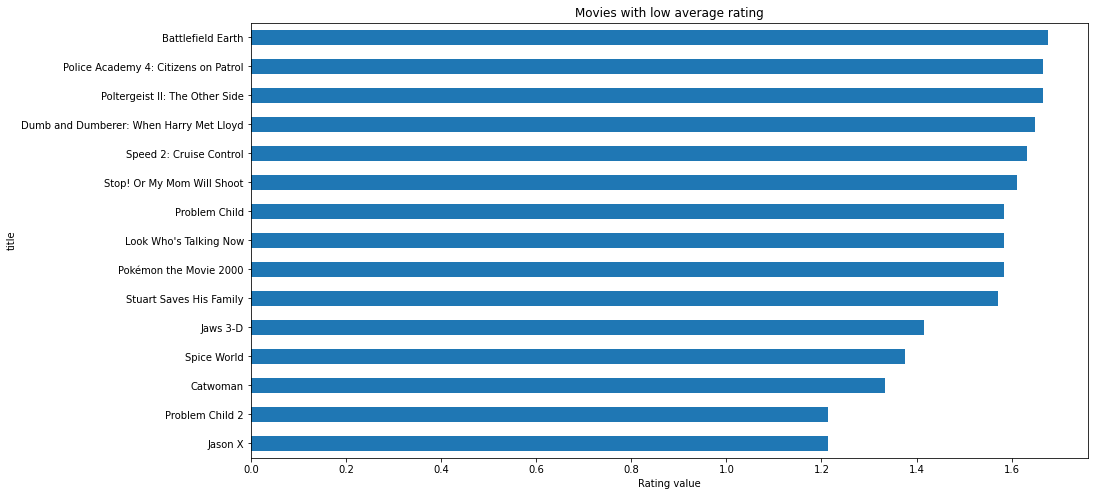

In [ ]:
plt.xlabel("Rating value") # Labelling X-axis
plt.ylabel("Title") # Labelling Y-axis
plt.title("Movies with low average rating") # Giving Title for the plot

movies_grouped_rating['rating']['mean'].sort_values(ascending=True).head(15).plot(kind='barh', figsize=(15,8)) # Plotting horizontal bar graph


Total number of movies produced each year

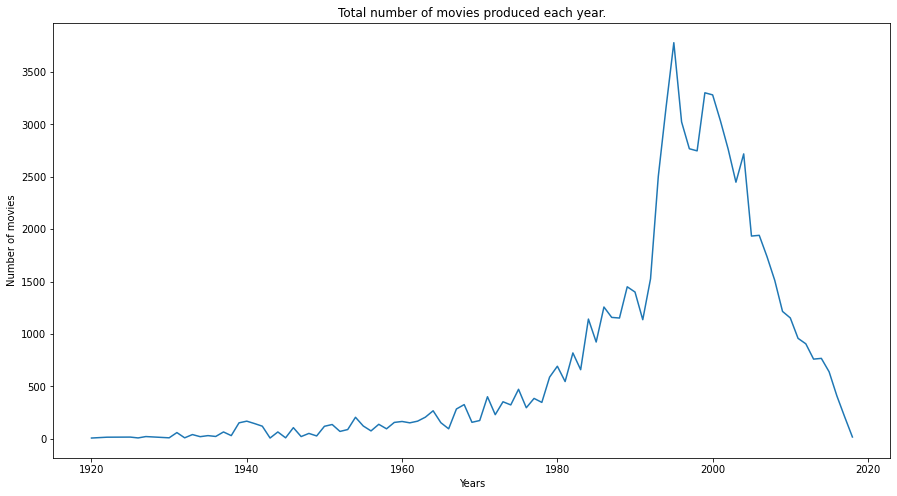

In [ ]:
plt.figure(figsize=(15,8))
releasetime = df.copy()
releasetime['year_release']=pd.to_datetime(releasetime['year'], format='%Y') # creating a new column with year in date format
releasetime['year_release'].dt.year.value_counts().sort_index().plot()
plt.xlabel('Years') # Labelling X-axis
plt.ylabel('Number of movies') # Labelling Y-axis
plt.title('Total number of movies produced each year.') # Giving Title for the plot
plt.show()

Percentage of Genres with maximum rating 5

In [ ]:
rating_max = df[df['rating']==5] # Filtering dataframe with rating greater than 5
rating_max.head()

,userId,movieId,rating,title,genres,year
3,1,47,5.0,Seven (a.k.a. Se7en),"[Mystery, Thriller]",1995.0
4,1,50,5.0,"Usual Suspects, The","[Crime, Mystery, Thriller]",1995.0
6,1,101,5.0,Bottle Rocket,"[Adventure, Comedy, Crime, Romance]",1996.0
8,1,151,5.0,Rob Roy,"[Action, Drama, Romance, War]",1995.0
9,1,157,5.0,Canadian Bacon,"[Comedy, War]",1995.0


{'Mystery': 14.043074767991595, 'Thriller': 11.181827589775432, 'Crime': 14.965761900833266, 'Adventure': 11.53991471905867, 'Comedy': 10.526870389884088, 'Romance': 11.689020586400499, 'Action': 10.821651930127238, 'Drama': 14.302539055734526, 'War': 20.11764705882353, 'Western': 15.805243445692884, 'Sci-Fi': 11.377784444611114, 'Children': 10.236334638248513, 'Animation': 12.275215011727912, 'Fantasy': 11.339187705817782, 'Musical': 13.10663585341697, 'Film-Noir': 22.271386430678465, 'Horror': 10.648615881996362, 'Documentary': 12.557077625570775, 'IMAX': 10.670356703567036}


<BarContainer object of 19 artists>

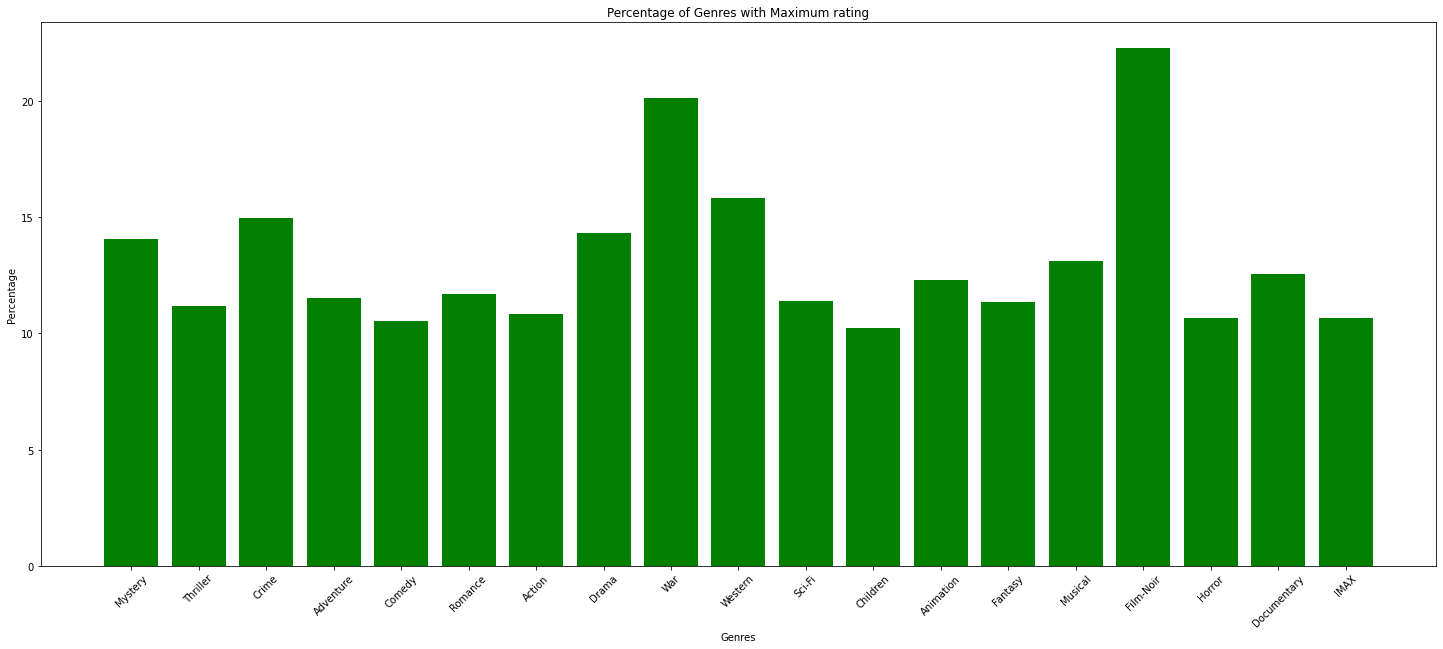

In [ ]:
plt.figure(figsize=(25,10))  # Determing the size of the plot
genre_list_max = rating_max['genres'] # Storing the genre column values in a variable
genres_count_max = {} # Declaring an empty dictionary
for genre_index_max in genre_list_max:  
    for genre in genre_index_max: 
        if(genres_count_max.get(genre,False)):  
            genres_count_max[genre]=genres_count_max[genre]+1
        else:
            genres_count_max[genre] = 1
plt.xlabel("Genres") # Labelling X-axis
plt.ylabel("Percentage") # Labelling Y-axis
plt.title("Percentage of Genres with Maximum rating") # Giving Title for the plot
plt.xticks(rotation = 45)

genre_count_max_per = {m : genres_count_max[m] / genres_count_popular[m] for m in genres_count_max } # Dividing the count of movies with max rating for genre by total number of count for that genre
# For loop to find the percentage of Genres with maximum rating 5
for key in genre_count_max_per:
    genre_count_max_per[key] *= 100 
print(genre_count_max_per)    

plt.bar(genre_count_max_per.keys(),genre_count_max_per.values(),color='green') # plotting bar graph with genres and their count




Pecentage of Genres with minimum rating (less than and equal to 1)

In [ ]:
rating_min = df[df['rating']<=1] # Filtering dataframe with rating greater than 5
rating_min.head()

,userId,movieId,rating,title,genres,year
205,1,3176,1.0,"Talented Mr. Ripley, The","[Drama, Mystery, Thriller]",1999.0
308,4,126,1.0,"NeverEnding Story III, The","[Adventure, Children, Fantasy]",1994.0
314,4,222,1.0,Circle of Friends,"[Drama, Romance]",1995.0
320,4,296,1.0,Pulp Fiction,"[Comedy, Crime, Drama, Thriller]",1994.0
329,4,441,1.0,Dazed and Confused,[Comedy],1993.0


{'Mystery': 3.1343022237786724, 'Thriller': 3.6427610472938015, 'Crime': 2.6730467783186205, 'Adventure': 3.708101689426243, 'Comedy': 4.562697576396206, 'Romance': 3.53243917654398, 'Action': 4.144921285313781, 'Drama': 2.584086736637916, 'War': 2.323529411764706, 'Western': 3.6704119850187267, 'Sci-Fi': 4.320108002700067, 'Children': 4.726692764970277, 'Animation': 2.3846755277560594, 'Fantasy': 3.512623490669594, 'Musical': 2.806206668867613, 'Film-Noir': 1.7699115044247788, 'Horror': 5.516265912305516, 'Documentary': 2.054794520547945, 'IMAX': 2.9827798277982778}


<BarContainer object of 19 artists>

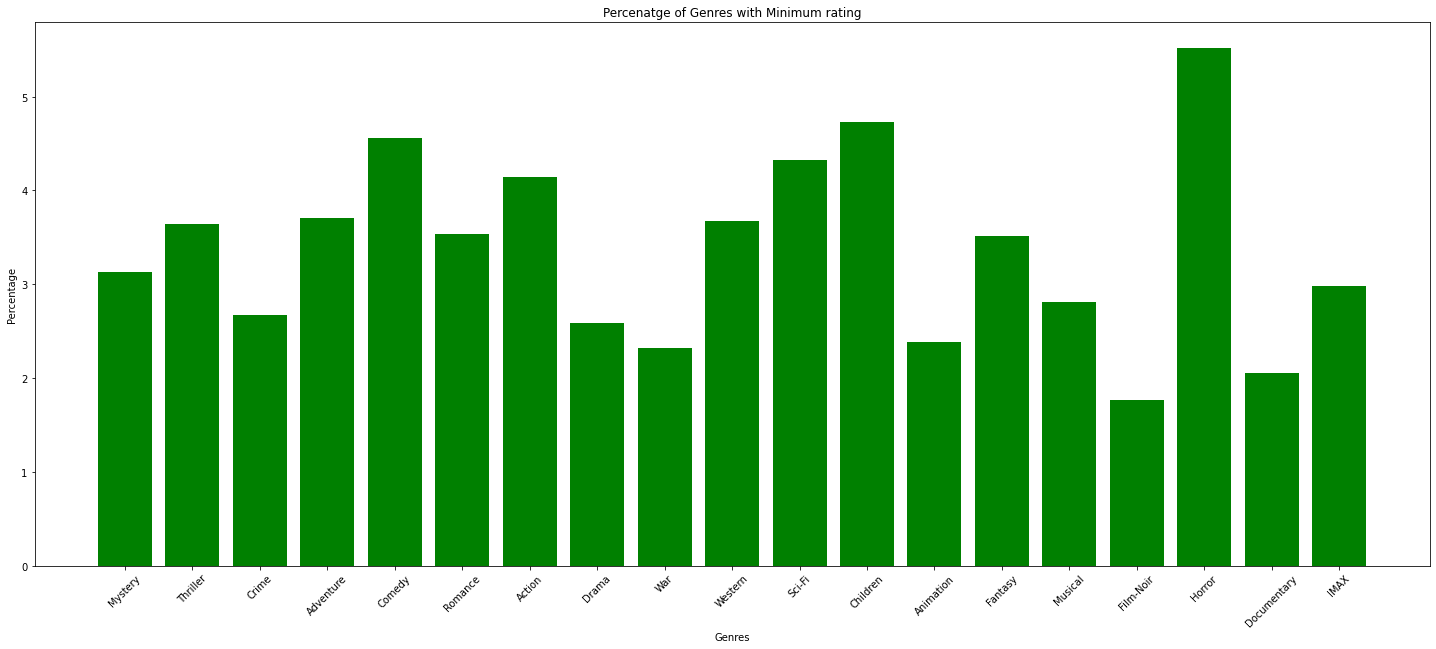

In [ ]:
plt.figure(figsize=(25,10))  # Determing the size of the plot
genre_list_min = rating_min['genres'] # Storing the genre column values in a variable
genres_count_min = {} # Declaring an empty dictionary
# for loop to find the genre count
for genre_index_min in genre_list_min: 
    for genre in genre_index_min:   
        if(genres_count_min.get(genre,False)):  
            genres_count_min[genre]=genres_count_min[genre]+1
        else:
            genres_count_min[genre] = 1
plt.xlabel("Genres") # Labelling X-axis
plt.ylabel("Percentage") # Labelling Y-axis
plt.title("Percenatge of Genres with Minimum rating") # Giving Title for the plot
plt.xticks(rotation = 45)

genre_count_min_per = {p : genres_count_min[p] / genres_count_popular[p] for p in genres_count_max }

for key in genre_count_min_per:
    genre_count_min_per[key] *= 100
print(genre_count_min_per)

plt.bar(genre_count_min_per.keys(),genre_count_min_per.values(),color='green') # plotting bar graph with genres and their count


Rating frequency in specific time period

In [ ]:
s_dictionary = {} # declaring empty dictionary for rating range and corresponding count value values
temp_list =[] # declaring list for storing rating frequency values
for rating_index in range(0,5,1):
    lower_limit_rating = rating_index+0.5
    higher_limit_rating = rating_index+1
    for i in range(1920,2020,20):
        lower_limit_year = i+1
        higher_limit_year = i+20
        temp_list.append(df[((df['rating']>=lower_limit_rating)& (df['rating']<=higher_limit_rating) )  & ((df['year']>=lower_limit_year) & (df['year']<=higher_limit_year))].shape[0]) 
    s_dictionary[str(lower_limit_rating) + "-" + str(higher_limit_rating) ]=temp_list
    temp_list =[]
s_dictionary

{'0.5-1': [11, 32, 107, 1651, 876],
 '1.5-2': [30, 61, 339, 4011, 1932],
 '2.5-3': [137, 338, 1209, 10470, 6068],
 '3.5-4': [293, 841, 2552, 14476, 11198],
 '4.5-5': [193, 648, 1862, 7123, 5047]}

Text(0, 0.5, 'Count of Movies')

<Figure size 5400x3600 with 0 Axes>

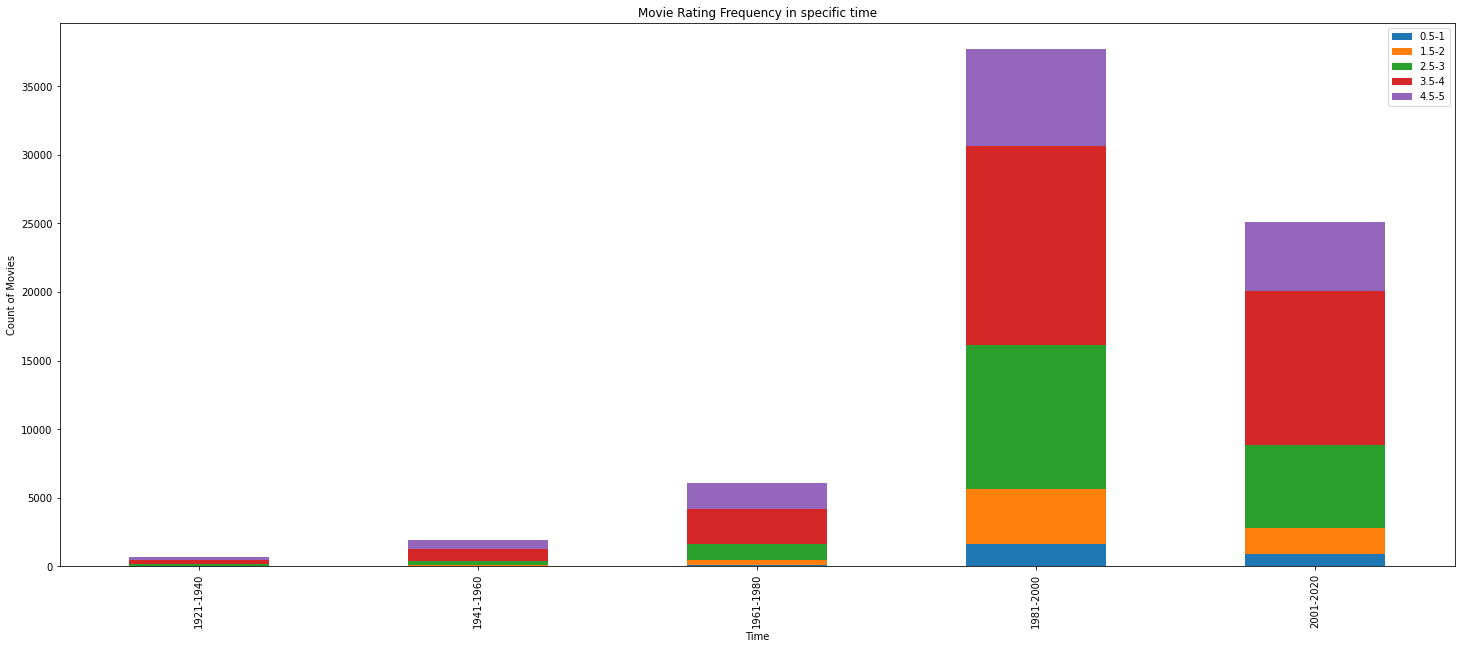

In [ ]:
plt.figure(figsize=(75,50))
plotdata = pd.DataFrame(s_dictionary, 
    index=["1921-1940", "1941-1960", "1961-1980", "1981-2000", "2001-2020"]
)
plt.rcParams["figure.figsize"] = (25, 10)
plotdata.plot(kind="bar",stacked=True)
plt.title("Movie Rating Frequency in specific time")
plt.xlabel("Time")
plt.ylabel("Count of Movies")

Rating frequency of Genres

In [ ]:
genre_list = df['genres'] # Storing the genre column values in a variable
genres_unique = [] # Declaring an empty dictionary
for genre_index in genre_list:  # for loop for the rows in genre column
    for genre in genre_index:   # for loop for genres in list of genres
        genres_unique.append(genre)
unique_genre_list =list(set(genres_unique))
unique_genre_list


['Documentary',
 'Action',
 'Horror',
 'Crime',
 'Animation',
 'Mystery',
 'Comedy',
 'Western',
 'Children',
 'Musical',
 'Thriller',
 'Drama',
 'Adventure',
 'Sci-Fi',
 'Film-Noir',
 'War',
 'IMAX',
 'Fantasy',
 'Romance']

In [ ]:
t_dictionary = {}
genres_list = df[['rating','genres']]
temp_list_genres =[]
genre_count=0

for rating_index in range(0,5,1):
    lower_limit_rating = rating_index+0.5
    higher_limit_rating = rating_index+1
    for genre_name in unique_genre_list:
        for k, genre_index in zip(genres_list.iloc[:,0], genres_list.iloc[:,1]) :
          if (k>=lower_limit_rating) & (k<=higher_limit_rating):
              for genre in genre_index:
                if genre== genre_name:
                  genre_count = genre_count+1
        temp_list_genres.append(genre_count)
        genre_count=0
    t_dictionary[str(lower_limit_rating) + "-" + str(higher_limit_rating) ]=temp_list_genres
    print(temp_list_genres)
    temp_list_genres =[]
t_dictionary

[9, 961, 273, 324, 122, 179, 1299, 49, 326, 85, 704, 746, 687, 576, 12, 79, 97, 320, 453]
[13, 2319, 627, 831, 321, 400, 2996, 102, 647, 207, 1750, 1826, 1668, 1367, 25, 179, 225, 852, 1104]
[82, 6218, 1337, 2777, 1233, 1268, 7883, 349, 1952, 806, 5098, 6463, 4819, 3378, 94, 638, 770, 2443, 3454]
[227, 9239, 1827, 5067, 2307, 2422, 11228, 510, 2762, 1292, 7888, 12723, 7619, 5344, 301, 1460, 1454, 3650, 5297]
[107, 4448, 885, 3122, 1133, 1442, 5064, 325, 1210, 639, 3886, 7111, 3734, 2668, 246, 1044, 706, 1845, 2516]


{'0.5-1': [9,
  961,
  273,
  324,
  122,
  179,
  1299,
  49,
  326,
  85,
  704,
  746,
  687,
  576,
  12,
  79,
  97,
  320,
  453],
 '1.5-2': [13,
  2319,
  627,
  831,
  321,
  400,
  2996,
  102,
  647,
  207,
  1750,
  1826,
  1668,
  1367,
  25,
  179,
  225,
  852,
  1104],
 '2.5-3': [82,
  6218,
  1337,
  2777,
  1233,
  1268,
  7883,
  349,
  1952,
  806,
  5098,
  6463,
  4819,
  3378,
  94,
  638,
  770,
  2443,
  3454],
 '3.5-4': [227,
  9239,
  1827,
  5067,
  2307,
  2422,
  11228,
  510,
  2762,
  1292,
  7888,
  12723,
  7619,
  5344,
  301,
  1460,
  1454,
  3650,
  5297],
 '4.5-5': [107,
  4448,
  885,
  3122,
  1133,
  1442,
  5064,
  325,
  1210,
  639,
  3886,
  7111,
  3734,
  2668,
  246,
  1044,
  706,
  1845,
  2516]}

Text(0, 0.5, 'Count of Movies')

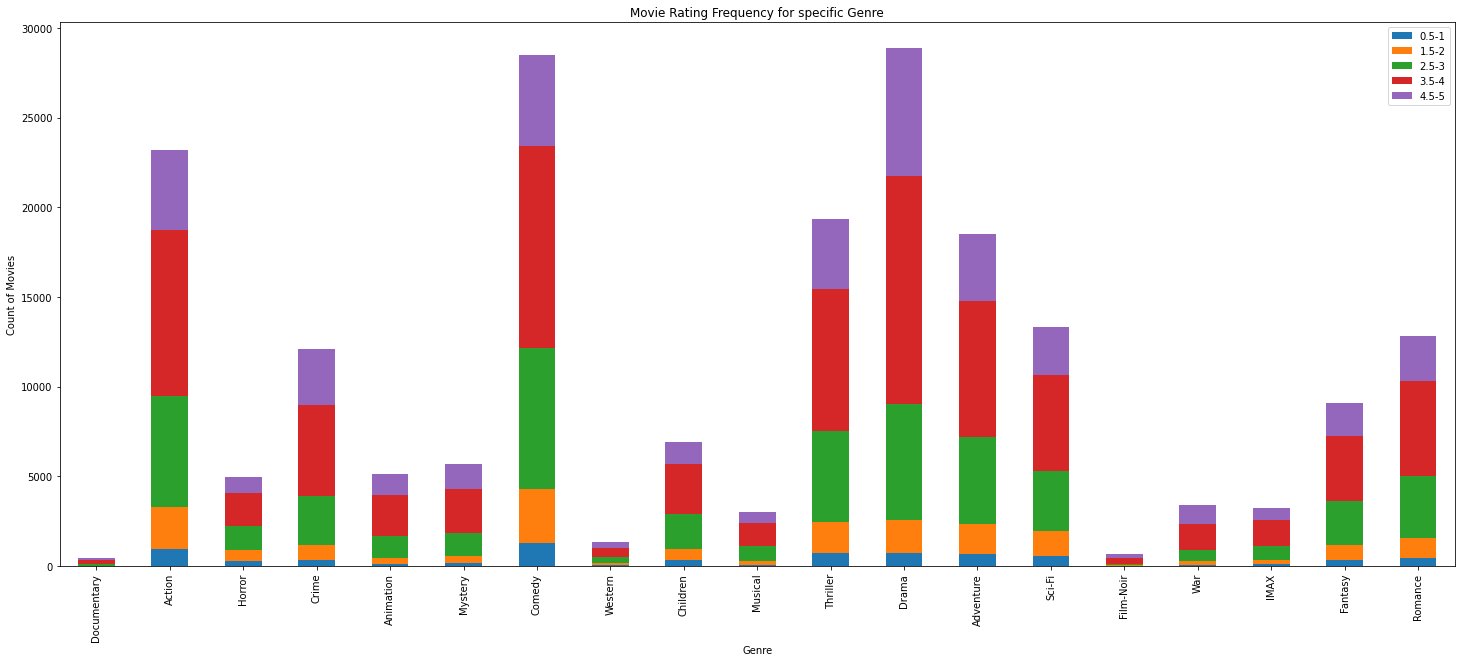

In [ ]:
plotdata = pd.DataFrame(t_dictionary, 
    index= unique_genre_list)
plt.rcParams["figure.figsize"] = (25, 10)
plotdata.plot(kind="bar",stacked=True) # plotting stacked bar plot
plt.title("Movie Rating Frequency for specific Genre") # Giving Title for the plot
plt.xlabel("Genre") # Labelling X-axis
plt.ylabel("Count of Movies") # Labelling Y-axis

Content Based Filtering

In [ ]:
link=pd.read_csv('links.csv')

In [ ]:
movlink = pd.merge(link,m,on='movieId')

In [ ]:
movlink.head()

,movieId,imdbId,tmdbId,title,genres,year
0,1,114709,862.0,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995
1,2,113497,8844.0,Jumanji,"[Adventure, Children, Fantasy]",1995
2,3,113228,15602.0,Grumpier Old Men,"[Comedy, Romance]",1995
3,4,114885,31357.0,Waiting to Exhale,"[Comedy, Drama, Romance]",1995
4,5,113041,11862.0,Father of the Bride Part II,[Comedy],1995


In [ ]:
k=pd.read_csv('movies_metadata.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
k['imdb_id']=k['imdb_id'].str[-6:]
k['imdb_id']=pd.to_numeric(k['imdb_id'])

In [ ]:
k.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [ ]:

k=k[['title', 'imdb_id','overview','tagline','vote_count','vote_average']]
k.head()

,title,imdb_id,overview,tagline,vote_count,vote_average
0,Toy Story,114709.0,"Led by Woody, Andy's toys live happily in his ...",NaN,5415.0,7.7
1,Jumanji,113497.0,When siblings Judy and Peter discover an encha...,Roll the dice and unleash the excitement!,2413.0,6.9
2,Grumpier Old Men,113228.0,A family wedding reignites the ancient feud be...,Still Yelling. Still Fighting. Still Ready for...,92.0,6.5
3,Waiting to Exhale,114885.0,"Cheated on, mistreated and stepped on, the wom...",Friends are the people who let you be yourself...,34.0,6.1
4,Father of the Bride Part II,113041.0,Just when George Banks has recovered from his ...,Just When His World Is Back To Normal... He's ...,173.0,5.7


In [ ]:
dfc= movlink.merge(k, left_on='imdbId', right_on='imdb_id', how='inner')

In [ ]:
del dfc['imdb_id']
del dfc['title_x']
#del dfc['genres_y']
del dfc['tmdbId']
dfc.rename(columns={'title_y': 'title', 'genres_x': 'genres'}, inplace=True)

In [ ]:
dfc.head()

,movieId,imdbId,genres,year,title,overview,tagline,vote_count,vote_average
0,1,114709,"[Adventure, Animation, Children, Comedy, Fantasy]",1995,Toy Story,"Led by Woody, Andy's toys live happily in his ...",NaN,5415.0,7.7
1,2,113497,"[Adventure, Children, Fantasy]",1995,Jumanji,When siblings Judy and Peter discover an encha...,Roll the dice and unleash the excitement!,2413.0,6.9
2,3,113228,"[Comedy, Romance]",1995,Grumpier Old Men,A family wedding reignites the ancient feud be...,Still Yelling. Still Fighting. Still Ready for...,92.0,6.5
3,4,114885,"[Comedy, Drama, Romance]",1995,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",Friends are the people who let you be yourself...,34.0,6.1
4,5,113041,[Comedy],1995,Father of the Bride Part II,Just when George Banks has recovered from his ...,Just When His World Is Back To Normal... He's ...,173.0,5.7


#EDA for Dataset 2

Movies with High Vote Average

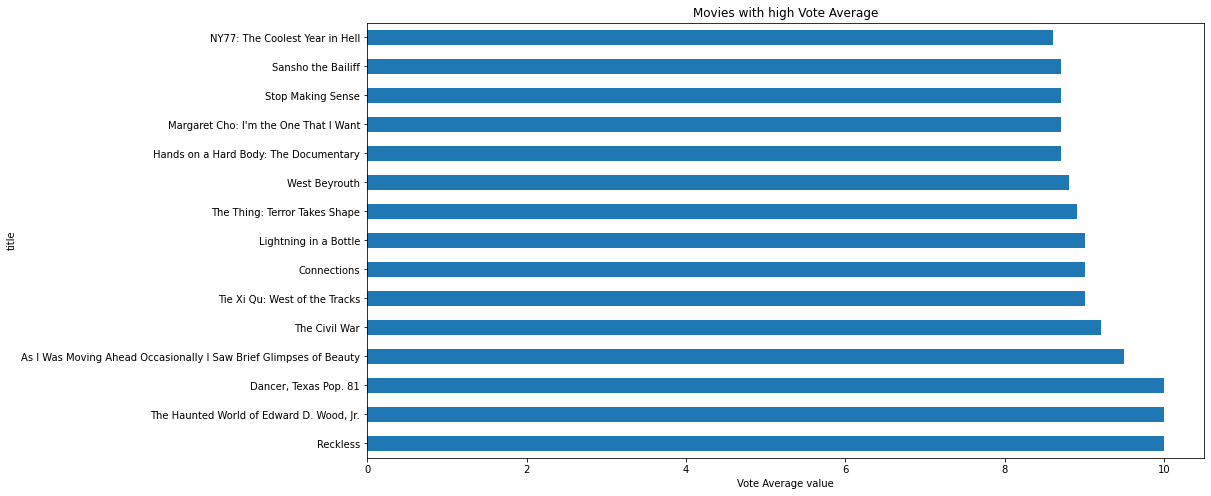

In [ ]:
movies_grouped_vote = dfc.groupby('title').agg([np.size, np.mean]) # grouping by title and calculating mean

movies_grouped_vote.head()

plt.xlabel("Vote Average value") # Labelling X-axis
plt.ylabel("Title") # Labelling Y-axis
plt.title("Movies with high Vote Average") # Giving Title for the plot

movies_grouped_vote['vote_average']['mean'].sort_values(ascending=False).head(15).plot(kind='barh', figsize=(15,8)) # plotting horizontal bar graph


Top 15 Movies with high vote frequency average

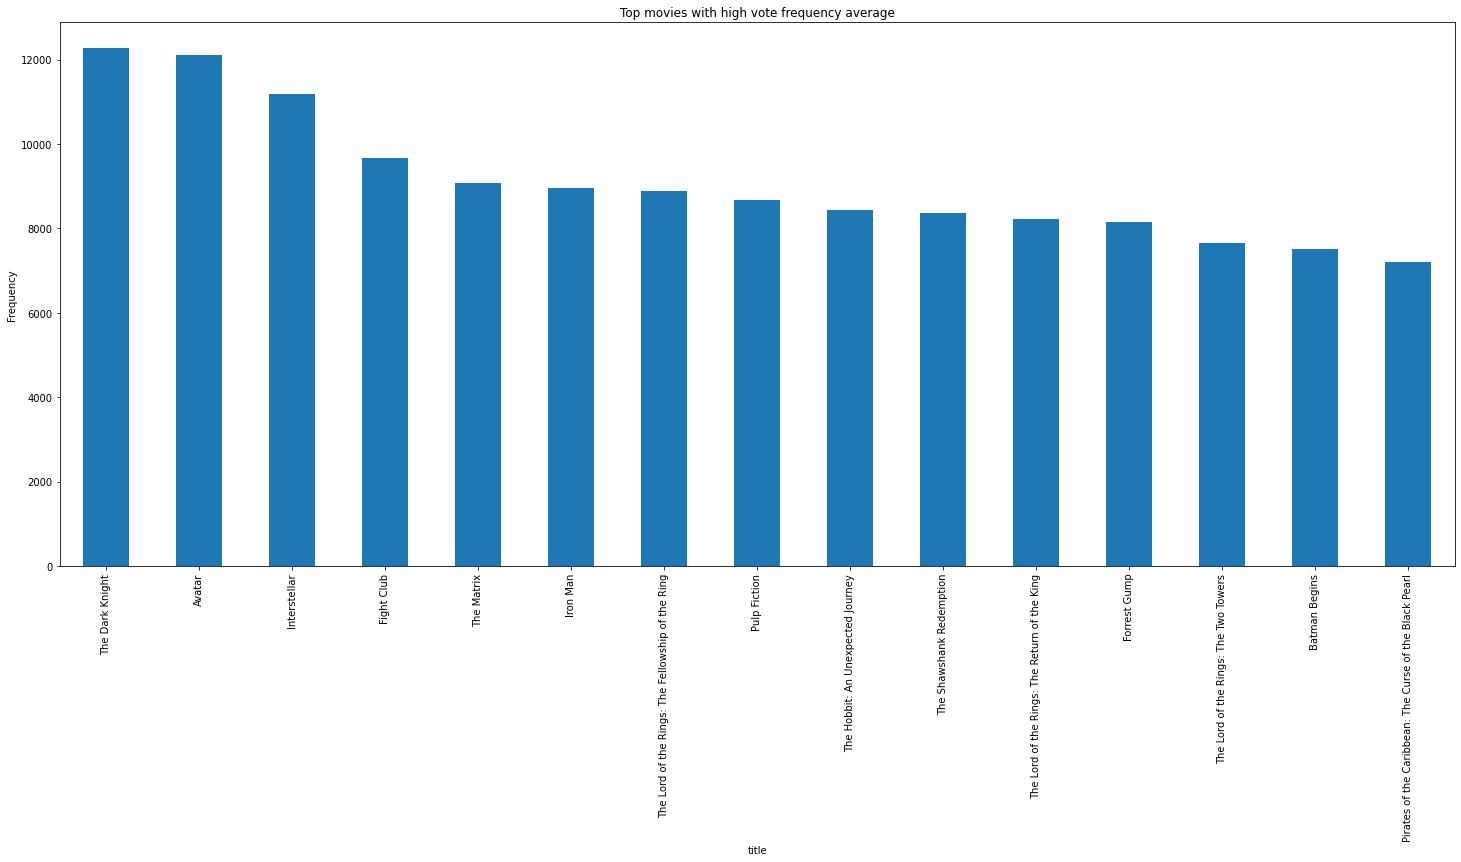

In [ ]:

users_grouped_count_vote = dfc.groupby('title').agg([np.mean])

users_grouped_count_vote.head()

plt.xlabel("Movie title") # Labelling X-axis
plt.ylabel("Frequency") # Labelling Y-axis
plt.title("Top movies with high vote frequency average") # Giving Title for the plot

users_grouped_count_vote['vote_count']['mean'].sort_values(ascending=False).head(15).plot( kind = 'bar', figsize = (25,10)) # plotting bar graph


Vote average frequency for Genres

In [ ]:
genre_list = dfc['genres'] # Storing the genre column values in a variable
genres_unique = [] # Declaring an empty dictionary
for genre_index in genre_list:  # for loop for the rows in genre column
    for genre in genre_index:   # for loop for genres in list of genres
        genres_unique.append(genre)
unique_genre_list =list(set(genres_unique))
unique_genre_list


vote_dictionary = {}
genres_list_vote = dfc[['vote_average','genres']]
temp_list_genres_vote =[]
genre_count_vote=0

for vote_index in range(0,10,2):
    lower_limit_vote = vote_index+0.1
    higher_limit_vote = vote_index+2
    for genre_name in unique_genre_list:
        for j, genre_index in zip(genres_list_vote.iloc[:,0], genres_list_vote.iloc[:,1]) :
          if (j>=lower_limit_vote) & (j<=higher_limit_vote):
              for genre in genre_index:
                if genre== genre_name:
                  genre_count_vote = genre_count_vote+1
        temp_list_genres_vote.append(genre_count_vote)
        genre_count_vote=0
    vote_dictionary[str(lower_limit_vote) + "-" + str(higher_limit_vote) ]=temp_list_genres_vote
    print(temp_list_genres_vote)
    temp_list_genres_vote =[]
vote_dictionary

[0, 1, 2, 0, 0, 0, 1, 0, 0, 0, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0]
[7, 34, 31, 9, 1, 4, 56, 0, 14, 3, 15, 23, 15, 25, 0, 5, 0, 14, 16, 0]
[24, 510, 349, 226, 68, 103, 1188, 33, 206, 51, 495, 716, 316, 276, 6, 48, 18, 193, 413, 0]
[222, 753, 350, 681, 277, 337, 1568, 108, 303, 248, 910, 2701, 607, 380, 75, 273, 51, 356, 893, 1]
[22, 15, 7, 21, 8, 7, 24, 2, 2, 2, 16, 65, 10, 4, 3, 13, 2, 11, 12, 0]


{'0.1-2': [0, 1, 2, 0, 0, 0, 1, 0, 0, 0, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0],
 '2.1-4': [7,
  34,
  31,
  9,
  1,
  4,
  56,
  0,
  14,
  3,
  15,
  23,
  15,
  25,
  0,
  5,
  0,
  14,
  16,
  0],
 '4.1-6': [24,
  510,
  349,
  226,
  68,
  103,
  1188,
  33,
  206,
  51,
  495,
  716,
  316,
  276,
  6,
  48,
  18,
  193,
  413,
  0],
 '6.1-8': [222,
  753,
  350,
  681,
  277,
  337,
  1568,
  108,
  303,
  248,
  910,
  2701,
  607,
  380,
  75,
  273,
  51,
  356,
  893,
  1],
 '8.1-10': [22,
  15,
  7,
  21,
  8,
  7,
  24,
  2,
  2,
  2,
  16,
  65,
  10,
  4,
  3,
  13,
  2,
  11,
  12,
  0]}

Text(0, 0.5, 'Count of Movies')

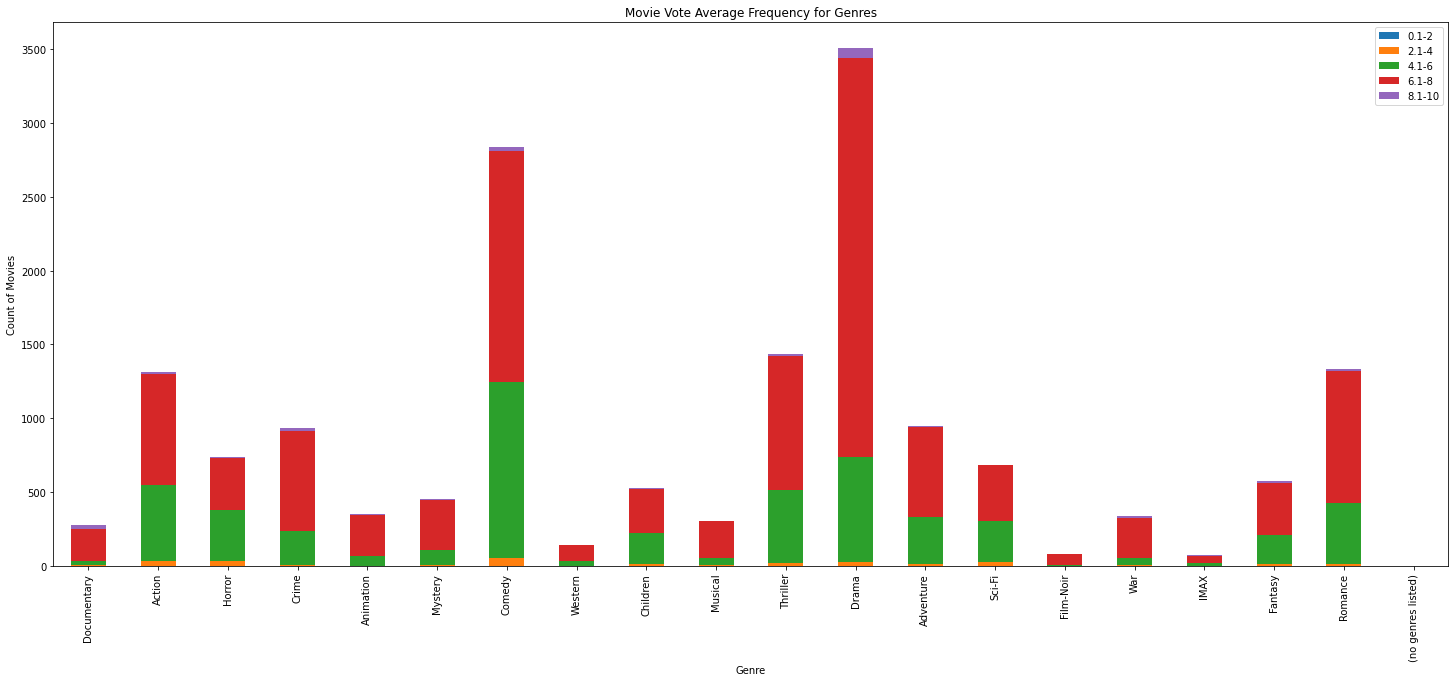

In [ ]:
plotdata = pd.DataFrame(vote_dictionary, 
    index= unique_genre_list
)
plt.rcParams["figure.figsize"] = (25, 10)
plotdata.plot(kind="bar",stacked=True) # Plotting bar graph
plt.title("Movie Vote Average Frequency for Genres") # Giving Title for the plot
plt.xlabel("Genre") # Labelling X-axis
plt.ylabel("Count of Movies") # Labelling Y-axis

In [ ]:
genres_list_vote

,vote_average,genres
0,7.7,"[Adventure, Animation, Children, Comedy, Fantasy]"
1,6.9,"[Adventure, Children, Fantasy]"
2,6.5,"[Comedy, Romance]"
3,6.1,"[Comedy, Drama, Romance]"
4,5.7,[Comedy]
...,...,...
7450,6.3,[Comedy]
7451,8.0,"[Action, Adventure, Animation, Comedy, Sci-Fi]"
7452,8.1,[Comedy]
7453,6.9,"[Comedy, Romance]"


In [ ]:
dfc['tagline'] = dfc['tagline'].fillna('')
dfc['description'] = dfc['overview'] + dfc['tagline']+dfc['title']
dfc['description'] = dfc['description'].fillna('')


In [ ]:
dfc['description'][0]

"Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside their differences.Toy Story"

Creating word cloud for Movie title

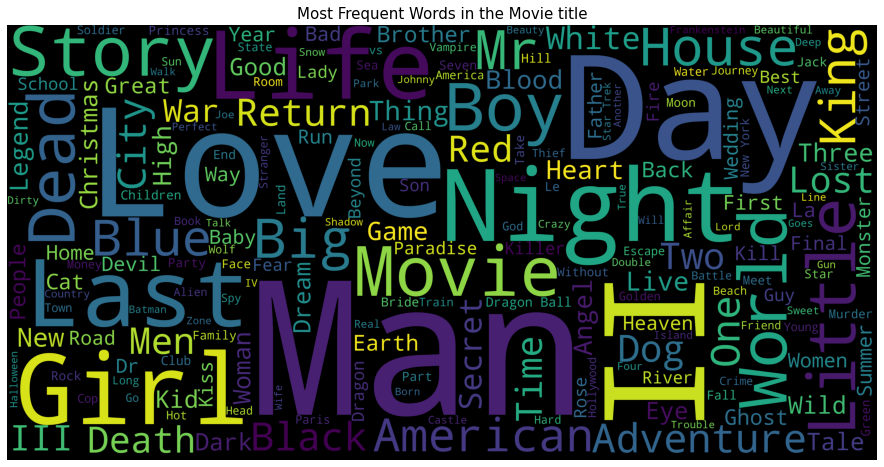

In [ ]:
# Create a wordcloud of the movie title
from wordcloud import WordCloud, STOPWORDS
dfc['title'] = dfc['title'].fillna("").astype('str')
title_corpus = ' '.join(dfc['title'])
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', height=2000, width=4000).generate(title_corpus)

# Plot the wordcloud
fig, ax = plt.subplots(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.title('Most Frequent Words in the Movie title', fontsize = 15)
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(dfc['description'])
tfidf_matrix.shape

(7455, 239285)

In [ ]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim[0]

array([1.        , 0.00645353, 0.        , ..., 0.00896567, 0.        ,
       0.        ])

In [ ]:
cosine_sim[:4, :4]

array([[1.        , 0.00645353, 0.        , 0.        ],
       [0.00645353, 1.        , 0.01502204, 0.        ],
       [0.        , 0.01502204, 1.        , 0.        ],
       [0.        , 0.        , 0.        , 1.        ]])

In [ ]:
# Build a 1-dimensional array with movie titles
titles = dfc['title']
indices = pd.Series(dfc.index, index=dfc['title'])


In [ ]:

# Function that get movie recommendations based on the cosine similarity score of movie descriptions
def generate_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:31]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

In [ ]:
generate_recommendations('Jumanji').head(20)

5218                       Big Game
6272                     Stay Alive
3899      The Giant Spider Invasion
3050             Dungeons & Dragons
5227       Night of the Living Dead
1379                    He Got Game
7303                    Geri's Game
1580                      Peter Pan
5701                        Nirvana
6205                  Grandma's Boy
3845                     Panic Room
3652                       Spy Game
2195           For Love of the Game
2003                       eXistenZ
4329               Poolhall Junkies
6161     Zathura: A Space Adventure
7367     Alan Partridge: Alpha Papa
1557                    BASEketball
4535        Spy Kids 3-D: Game Over
1029    Amityville: It's About Time
Name: title, dtype: object

In [ ]:
generate_recommendations('Batman Forever')

2469                 Batman: Mask of the Phantasm
6798                              The Dark Knight
6014                                Batman Begins
1197                               Batman & Robin
517                                        Batman
1080                               Batman Returns
7368              Batman: Mystery of the Batwoman
5716    The Batman Superman Movie: World's Finest
5727           Batman Beyond: Return of the Joker
660                           Eyes Without a Face
6083                                     Cry_Wolf
2492                              Wayne's World 2
144                                       Hackers
1998                               Open Your Eyes
2579                                          JFK
6027                                At the Circus
6847                          The Incredible Hulk
2491                                Wayne's World
6150                                 Just Friends
4529                                Loose Cannons


One thing that we notice about our recommendation system is that it recommends movies regardless of ratings and popularity. It is true that Batman and Robin has a lot of similar characters as compared to The Dark Knight but it was a terrible movie that shouldn't be recommended to anyone.

Therefore, we will add a mechanism to remove bad movies and return movies which are popular and have had a good critical response.

I will take the top 25 movies based on similarity scores and calculate the vote of the 60th percentile movie. Then, using this as the value of , we will calculate the weighted rating of each movie using IMDB's formula like we did in the Simple Recommender section.

weighted rating (WR) = (v ÷ (v+m)) × R + (m ÷ (v+m)) × C where: R = average for the movie (mean) = (Rating) v = number of votes for the movie = (votes) m = minimum votes required to be listed in the Top 250 (currently 25000)

In [ ]:
n=0
def weighted_rating(x):
    vote_averages = dfc[dfc['vote_average'].notnull()]['vote_average'].astype('int')
    C = vote_averages.mean()
    v = x['vote_count']
    R = x['vote_average']
    return (v/(v+n) * R) + (n/(n+v) * C)

In [ ]:
def improved_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:26]
    movie_indices = [i[0] for i in sim_scores]
    
    movies = dfc.iloc[movie_indices][['title', 'vote_count', 'vote_average', 'year']]
    vote_counts = movies[movies['vote_count'].notnull()]['vote_count'].astype('int')
    vote_averages = movies[movies['vote_average'].notnull()]['vote_average'].astype('int')
    C = vote_averages.mean()
    n = vote_counts.quantile(0.60)
    qualified = movies[(movies['vote_count'] >= n) & (movies['vote_count'].notnull()) & (movies['vote_average'].notnull())]
    qualified['vote_count'] = qualified['vote_count'].astype('int')
    qualified['vote_average'] = qualified['vote_average'].astype('int')
    qualified['weightedrating'] = qualified.apply(weighted_rating, axis=1)
    qualified = qualified.sort_values('weightedrating', ascending=False).head(10)
    return qualified

In [ ]:
improved_recommendations('Batman Forever')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

,title,vote_count,vote_average,year,weightedrating
6798,The Dark Knight,12269,8,2008,8.0
6014,Batman Begins,7511,7,2005,7.0
517,Batman,2145,7,1989,7.0
4764,WarGames,517,7,1983,7.0
1080,Batman Returns,1706,6,1992,6.0
6847,The Incredible Hulk,3086,6,2008,6.0
2491,Wayne's World,738,6,1992,6.0
558,DragonHeart,553,6,1996,6.0
797,Robin Hood: Prince of Thieves,937,6,1991,6.0
1197,Batman & Robin,1447,4,1997,4.0


Collaborative Filtering


In [ ]:
pip install surprise

     |████████████████████████████████| 11.8 MB 4.8 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1630196 sha256=753fe202744bd87f391c2c7523ca4c11c229ddbfb78db9e3887efea0e9349c35
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [ ]:
#Import necessary libraries
import numpy as np
import pandas as pd
from surprise import SVD
from surprise.prediction_algorithms import KNNWithMeans, KNNBasic, KNNBaseline
from surprise import Dataset, Reader
from surprise import accuracy
from surprise.model_selection import cross_validate, train_test_split, GridSearchCV

In [ ]:
#Import data into a DataFrame and drop unnecessary columns 
df2 = df[['userId', 'movieId', 'rating']]

In [ ]:
#Instansiate reader and data 
reader = Reader(rating_scale=(0, 5))
data = Dataset.load_from_df(df2, reader) 

In [ ]:
df2['rating'].describe()

count    71512.000000
mean         3.506034
std          1.015955
min          0.500000
25%          3.000000
50%          3.500000
75%          4.000000
max          5.000000
Name: rating, dtype: float64

In [ ]:
trainset, testset = train_test_split(data, test_size=.2)

1. Baseline Model

In [ ]:
baseline = KNNBaseline(random_state=42)

In [ ]:
baseline.fit(trainset)

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.


In [ ]:
baselinepreds = baseline.test(testset)

In [ ]:
#Check RMSE and MAE results 
accuracy.rmse(baselinepreds)
accuracy.mae(baselinepreds)

RMSE: 0.8332
MAE:  0.6396


0.6395912343083184

In [ ]:
cv_baseline = cross_validate(baseline, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBaseline on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.8352  0.8455  0.8489  0.8432  0.0058  
MAE (testset)     0.6410  0.6475  0.6490  0.6458  0.0035  
Fit time          0.25    0.27    0.26    0.26    0.01    
Test time         1.66    1.78    1.70    1.71    0.05    


In [ ]:
for i in cv_baseline.items():
    print(i)

('test_rmse', array([0.83520314, 0.84545857, 0.84891401]))
('test_mae', array([0.64101954, 0.6474553 , 0.64902692]))
('fit_time', (0.24688243865966797, 0.27338719367980957, 0.2608153820037842))
('test_time', (1.6559627056121826, 1.781280755996704, 1.6950058937072754))


In [ ]:
#Find the average test RMSE from the 3-Fold cross-validation
np.mean(cv_baseline['test_rmse'])

0.8431919067554746

2. Gridsearch + SVD

In [ ]:
#Set parameters for GridSearch on SVD model 
parameters = {'n_factors': [20, 50, 80],
             'reg_all': [0.04, 0.06],
             'n_epochs': [10, 20, 30],
             'lr_all': [.002, .005, .01]}
gridsvd = GridSearchCV(SVD, param_grid=parameters, n_jobs=-1)

In [ ]:
#Fit SVD model on data
gridsvd.fit(data)

In [ ]:
#Print best score and best parameters from the GridSearch 
print(gridsvd.best_score)
print(gridsvd.best_params)

{'rmse': 0.8237735233519986, 'mae': 0.630668163499718}
{'rmse': {'n_factors': 50, 'reg_all': 0.06, 'n_epochs': 30, 'lr_all': 0.01}, 'mae': {'n_factors': 80, 'reg_all': 0.06, 'n_epochs': 30, 'lr_all': 0.01}}


In [ ]:
#Reinstantiate the model with the best parameters fromGridSearch 
svdtuned = SVD(n_factors=80,
               reg_all=0.06,
               n_epochs=30,
               lr_all=0.01)

In [ ]:
#Fit and predict the model 
svdtuned.fit(trainset)
svdpreds = svdtuned.test(testset)

In [ ]:
#Print RMSE and MAE results 
accuracy.rmse(svdpreds)
accuracy.mae(svdpreds)

RMSE: 0.8184
MAE:  0.6277


0.6276898222980929

In [ ]:
#Perform 3-Fold cross validation for SVD tuned model
cv_svd_tuned = cross_validate(svdtuned, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.8284  0.8364  0.8336  0.8328  0.0033  
MAE (testset)     0.6345  0.6413  0.6378  0.6379  0.0028  
Fit time          9.84    9.22    4.03    7.69    2.61    
Test time         0.35    0.61    0.16    0.37    0.18    


In [ ]:
#Display the results for all 3-folds 
for i in cv_svd_tuned.items():
    print(i)

('test_rmse', array([0.82843871, 0.8364493 , 0.83362545]))
('test_mae', array([0.63445653, 0.64134004, 0.63781342]))
('fit_time', (9.841492891311646, 9.215481042861938, 4.0250959396362305))
('test_time', (0.35422658920288086, 0.6065769195556641, 0.15846753120422363))


In [ ]:
# Print out the average RMSE score for the test set
np.mean(cv_svd_tuned['test_rmse'])

0.8328378223589837

3. Gridsearch + KNN Basic

In [ ]:
# Set parameters to be used in KNN models 
knn_params = {'name': ['cosine', 'pearson'],
              'user_based':[True, False], 
              'min_support':[True, False],
            'min_k' : [1, 2]}

In [ ]:
# Apply GridSearch to the KNN Basic model to identify the best parameters
gsknnbasic = GridSearchCV(KNNBasic, knn_params, measures=['rmse', 'mae'], cv=3)
gsknnbasic.fit(data)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

In [ ]:
#Display the best scores and parameters from GridSearch
print(gsknnbasic.best_score)
print(gsknnbasic.best_params)

{'rmse': 0.9160911909276134, 'mae': 0.7064954991626067}
{'rmse': {'name': 'cosine', 'user_based': True, 'min_support': True, 'min_k': 2}, 'mae': {'name': 'cosine', 'user_based': True, 'min_support': True, 'min_k': 2}}


In [ ]:
#Reinstantiate the model with the best parameters from GridSearch 
knnbasic_tuned = KNNBasic(sim_options={'name': 'cosine', 
                                       'user_based': True, 
                                       'min_support':True, 
                                       'min_k':1, })

In [ ]:
#Fit on the train set and predict on the test set 
knnbasic_tuned.fit(trainset)
knnbpreds = knnbasic_tuned.test(testset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [ ]:
#Print RMSE and MAE results 
accuracy.rmse(knnbpreds)
accuracy.mae(knnbpreds)

RMSE: 0.9304
MAE:  0.7211


0.7211030690070764

In [ ]:
#Conduct cross validation for the KNNBasic tuned model 
cv_knn_basic = cross_validate(knnbasic_tuned, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9388  0.9405  0.9395  0.9396  0.0007  
MAE (testset)     0.7289  0.7280  0.7256  0.7275  0.0014  
Fit time          0.08    0.09    0.09    0.09    0.00    
Test time         1.27    1.29    1.41    1.32    0.06    


In [ ]:
# Print out results from the cross-valdiatoin 
for i in cv_knn_basic.items():
    print(i)

('test_rmse', array([0.93878647, 0.94047148, 0.93948338]))
('test_mae', array([0.72892365, 0.72804422, 0.72560905]))
('fit_time', (0.08301949501037598, 0.09078478813171387, 0.09174799919128418))
('test_time', (1.2721271514892578, 1.2851777076721191, 1.4111764430999756))


In [ ]:
# Print out the average RMSE score for the test set
np.mean(cv_knn_basic['test_rmse'])

0.9395804448572593

Model comparison

In [ ]:
#Create a dictionary for each models' results 
baselineresult = {'model': 'baseline','RMSE': accuracy.rmse(baselinepreds), 'MAE': accuracy.mae(baselinepreds), 'CV': np.mean(cv_baseline['test_rmse'])}
svdresult = {'model':'svd', 'RMSE': accuracy.rmse(svdpreds), 'MAE': accuracy.mae(svdpreds), 'CV': np.mean(cv_svd_tuned['test_rmse'])}
knnbasicresult = {'model':'knnbasic','RMSE': accuracy.rmse(knnbpreds), 'MAE': accuracy.mae(knnbpreds), 'CV': np.mean(cv_knn_basic['test_rmse'])}


RMSE: 0.8332
MAE:  0.6396
RMSE: 0.8184
MAE:  0.6277
RMSE: 0.9304
MAE:  0.7211


In [ ]:
#Combine all the results into a list 
result_list = [baselineresult, svdresult, knnbasicresult]
#Transform the results lists into a DataFrame 
df_results_updated = pd.DataFrame.from_dict(result_list, orient='columns')
df_results_updated = df_results_updated.set_index('model')

In [ ]:
#Display the results for all of the models 
df_results_updated

,RMSE,MAE,CV
model,,,
baseline,0.833232,0.639591,0.843192
svd,0.818353,0.627690,0.832838
knnbasic,0.930377,0.721103,0.939580


Get Predictions

In [ ]:
#Create list of unique userIds and movieIds 
userids = df2['userId'].unique()
movieids = df2['movieId'].unique()

In [ ]:
#Create a list and append the userId, movieId, and estimated ratings 
predictions = []
for u in userids:
    for n in movieids:
        predicted = svdtuned.predict(u, n)
        predictions.append([u, n, predicted[3]])

In [ ]:
#Convert the list to a dataframe
estimated = pd.DataFrame(predictions)

In [ ]:
#rename columns of DataFrame 
estimated.rename(columns={0: 'userId', 1: 'movieId', 2:'estimatedrating'}, inplace=True)

In [ ]:
#Export the estimated data to a csv file 
estimated.to_csv('estimated.csv')

In [ ]:
estimated

In [ ]:
estimatedx= estimated.merge(m, left_on='movieId', right_on='movieId', how='inner')

In [ ]:
estimatedx.head()

In [ ]:
def generate(user,n):
  k=estimatedx[estimatedx["userId"]==user]
  k=k.sort_values("estimatedrating",ascending=False)
  k=k.reset_index()
  del k['index']
  return k.head(n)
  # else:
  #   print("User does not exist")

In [ ]:
generate(610,10)

In [ ]:
# # Predict a certain item i.e. what rating we expect a certain user to give?
i=1
j=151
actual_rating = df2[(df2.userId==i)&(df2.movieId==j)]['rating'].mean()
print('Prediction of a particular user:', svdtuned.predict(i,j, actual_rating).est)
print('Actual rating value is:', df2[(df2.userId==i)&(df2.movieId==j)]['rating'].mean())
print('')